# Lab #1 - DFT Examples
## Michael Pisman

**Spring 2025**

**EECS 207: Digital Image Processing**

**Due 11:59 pm Thursday, March 20 via CatCourses as .ipynb file**

*(version 3/10/25 9:29pm)*

Create one Jupyter Notebook (one .ipynb file) which does the following six parts below (A-F). Each part:
 - Creates a time domain signal
 - Plots the signal in the time domain.
 - Computes the frequency domain representation of the signal using the DFT.
 - Plots the frequency domain representation of the signal. Since the frequency domain
representation is complex, the spectrum (magnitude) is plotted.
 - Reconstructs the time domain representation of the signal using the IDFT.
 - Plots the reconstructed signal in the time domain. Since this reconstruction is complex, the real
part is plotted.

For each part, you need to:
 - Provide the Python code to produce the desired output.
 - Think about why you get the results you do based on your knowledge of the Fourier transform. In
particular, why do the frequency domain representations have the forms that they do?
 - A particularly challenging question is why is the frequency domain representation in Part (F)
different from that in Part (D)?
Part (A) already has the code so you don’t need to do anything for this part. In the other parts, you need
to provide the Python code in the Jupyter Notebook cells based on the Python comments and figures.
Notes:
 - he DFT can be computed using the FFT function in numpy.

## Part (A): A constant time domain signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N_SAMPLES = 100
PI = np.pi

In [2]:
# Create a 'constant' signal consisting of an array of length 100 with the value 1.
signal_time = np.ones(N_SAMPLES)

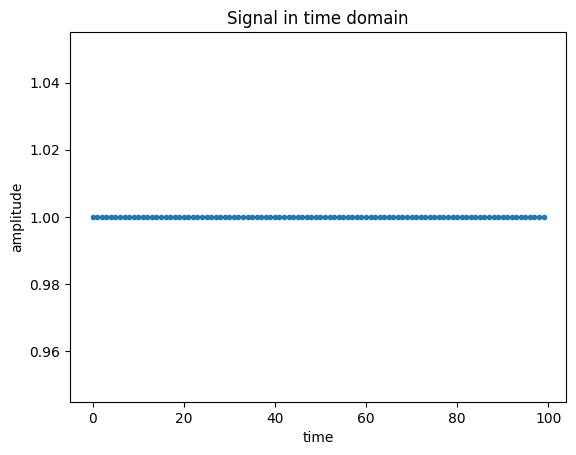

In [3]:
# Plot this signal in the time domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [4]:
# Calculate DFT of this signal.
signal_freq = np.fft.fft(signal_time)
print(abs(signal_freq))
# print(len(signal_freq))

[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


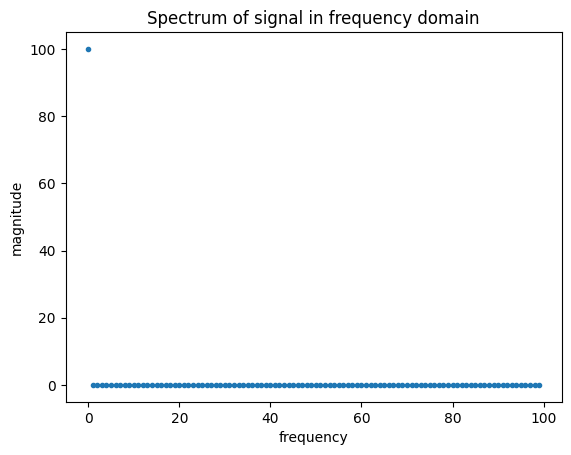

In [5]:
# Plot the magnitude (spectrum) of the signal in the frequency domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(abs(signal_freq),'.')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")
plt.show()

$$
\begin{align*}
X(k) &=  \sum_{n=0}^{N-1} e^{-\frac{i 2\pi k n}{N}} \\
\\
X(k) &=  \sum_{n=0}^{99} e^{-\frac{i 2\pi k n}{100}}
= \frac{1 - e^{-\frac{i 2\pi k 100}{100}}}{1 - e^{-\frac{i 2\pi k}{100}}}
= \frac{1 - e^{-i 2\pi k}}{1 - e^{-\frac{i 2\pi k}{100}}}
= \frac{1 - 1}{1 - e^{-\frac{i 2\pi k}{100}}}
= 0 \text{; for } k \neq 0 \\
X(0) &=  \sum_{n=0}^{99} e^{-\frac{i 2\pi 0 n}{100}} = 100
\end{align*}
$$

A Fourier Transform (DFT) decomposes a signal into frequency components. A constant signal doesn't oscillate or vary. It's the simplest possible waveform, with frequency = 0. This means the signal contains no frequency components, thus the DFT is zero for all frequencies except for the DC component (k=0), which is equal to the number of samples (100 in this case).

Constant signals have all their "energy" concentrated at the zero frequency component (DC component).

In [6]:
# Use IDFT to reconstruct time signal.
signal_time_recon = np.fft.ifft(signal_freq)

Text(0.5, 1.0, 'Reconstructed signal in time domain')

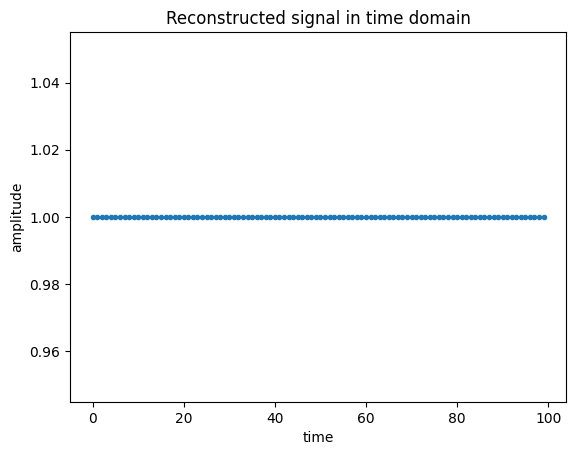

In [7]:
# Plot the reconstructed signal in the time domain. Since the output of the IDFT is
# complex, just plot real part.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time_recon.real,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Reconstructed signal in time domain")

## Part (B): An impulse in the time domain.

In [8]:

# Create an impulse, a length 100 signal of all 0s except for value 1 at time 0.
signal_time = np.zeros(N_SAMPLES)
signal_time[0] = 1

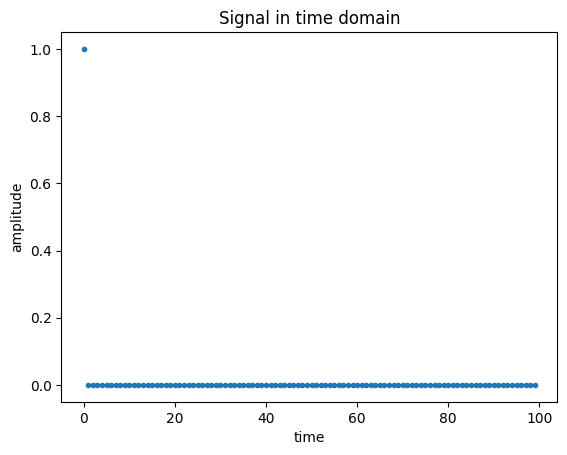

In [9]:
# Plot this signal in the time domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [10]:
# Calculate DFT of this signal.
signal_freq = np.fft.fft(signal_time)
# print(abs(signal_freq))

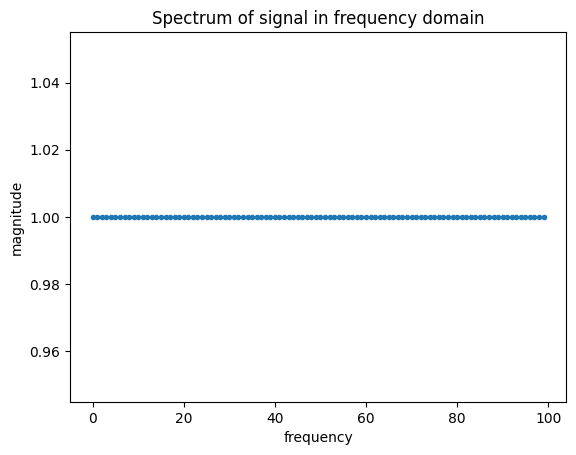

In [11]:
# Plot the magnitude (spectrum) of the signal in the frequency domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(abs(signal_freq),'.')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")
plt.show()

A single impulse has equal representation across all frequencies, so DFT contains equal strength in every frequency.

Mathematically:

$$
\begin{equation}
X_{k} = \sum_{n=0}^{N-1} x_{n} e^{-j\frac{2\pi kn}{N}}
= x_{0} e^{-j\frac{2\pi k \cdot 0}{N}}
= 1
\end{equation}
$$

In [12]:
# Use IDFT to reconstruct time signal.
signal_time_recon = np.fft.ifft(signal_freq)

Text(0.5, 1.0, 'Reconstructed signal in time domain')

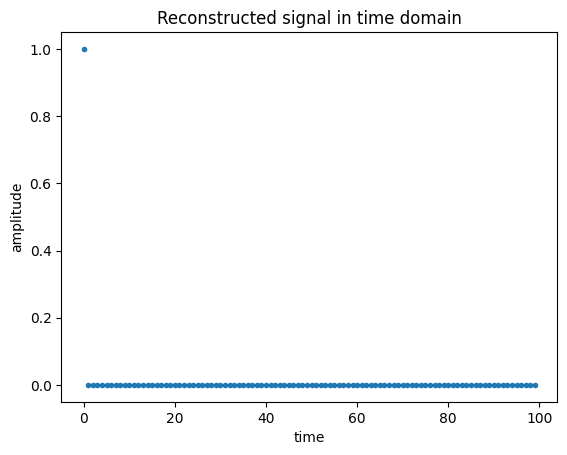

In [13]:
# Plot the reconstructed signal in the time domain. Since the output of the IDFT is
# complex, just plot real part.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time_recon.real,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Reconstructed signal in time domain")

## Part (C): A $\sin$ wave with period $\Tau = {2\pi}$.

In [14]:
# Create sampled sin wave with period 2*pi. There should be 100 samples
# spaced at intervals of (2*pi)/100 from 0 to 2*pi-(2*pi)/100.
# That is the first sample should be taken at 0 and the last sample
# at 2*pi-(2*pi)/100.
interval = np.linspace(0, 2.0*PI - (2*PI)/100, N_SAMPLES)
signal_time = np.sin(interval)


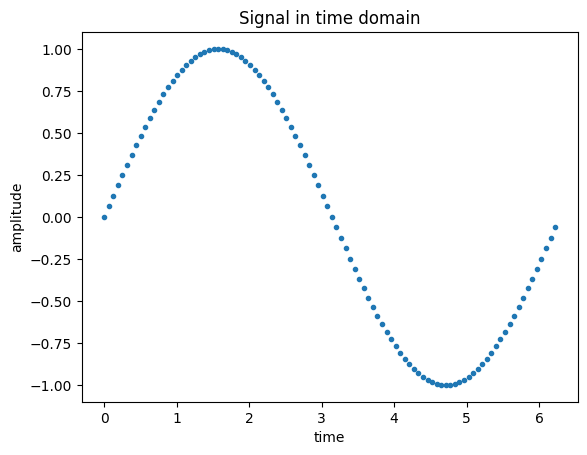

In [15]:
# Plot this signal in the time domain with x-axis going from 0
# to 2*pi-(2*pi)/100.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(interval, signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [16]:
# Calculate DFT of this signal.
signal_freq = np.fft.fft(signal_time)

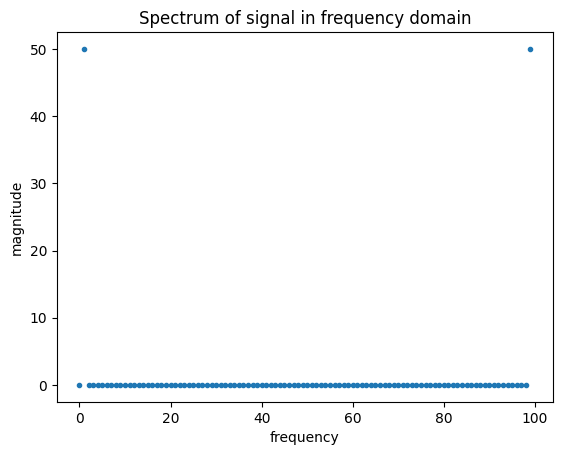

In [17]:
# Plot the magnitude (spectrum) of the signal in the frequency domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(abs(signal_freq),'.')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")
plt.show()

In [18]:
# Use IDFT to reconstruct time signal.
signal_time_recon = np.fft.ifft(signal_freq)

Text(0.5, 1.0, 'Reconstructed signal in time domain')

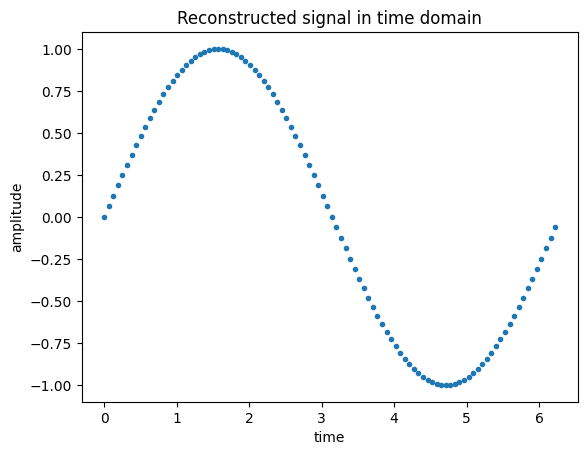

In [19]:
# Plot the reconstructed signal in the time domain. Since the output of the IDFT is
# complex, just plot real part.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(interval, signal_time_recon.real,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Reconstructed signal in time domain")

## Part (D): A ${\sin}$ wave with period $\Tau = {\pi}$.

In [20]:
# Repeat the above for a sampled sin wave with period pi. There should
# be 100 samples spaced at intervals of (2*pi)/100 from 0 to 2*pi-(2*pi)/100.
# That is, the first sample should be taken at 0 and the last
# sample at 2*pi-(2*pi)/100.
interval = np.linspace(0, 2*PI - 2*PI/100, N_SAMPLES)
signal_time = np.sin(2*interval)

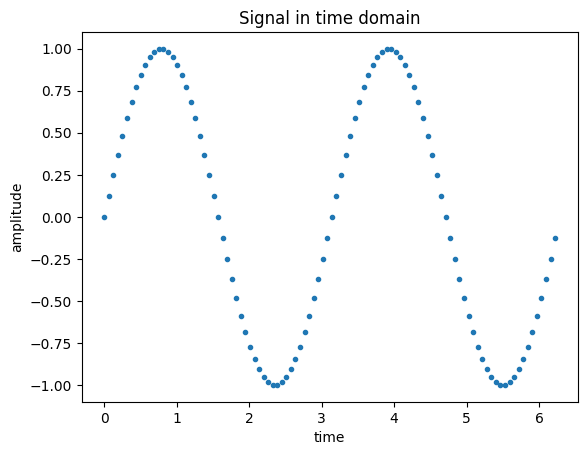

In [21]:
# Plot this signal in the time domain with x-axis going from 0
# to 2*pi-(2*pi)/100.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(interval, signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [ ]:
# Calculate DFT of this signal
signal_freq = np.fft.fft(signal_time)

: 

: 

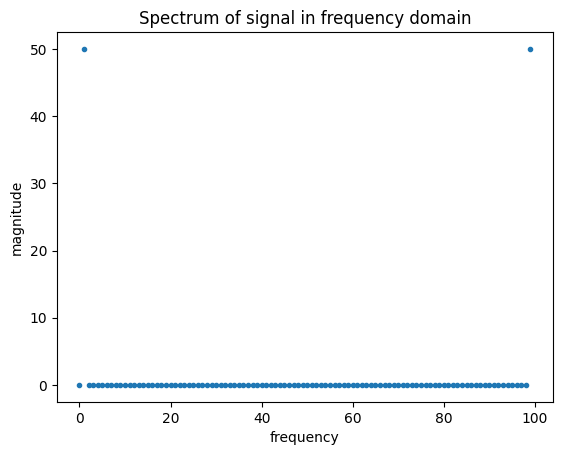

In [22]:
# Plot the magnitude (spectrum) of the signal in the frequency domain.
plt.plot(abs(signal_freq),'.')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")
plt.show()

In [23]:
# Use IDFT to reconstruct time signal.
signal_time_recon = np.fft.ifft(signal_freq)

Text(0.5, 1.0, 'Reconstructed signal in time domain')

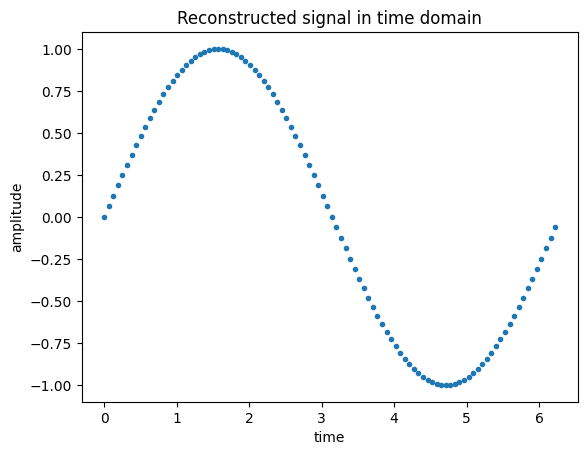

In [24]:
# Plot the reconstructed signal in the time domain. Since the output of the IDFT is
# complex, just plot real part.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(interval, signal_time_recon.real,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Reconstructed signal in time domain")

## Part (E): A box function

In [25]:
# Create a 'box' signal of length 100 with the first 20 samples equal to 1
# and the remaining equal to 0.
signal_time = np.ones(N_SAMPLES)
signal_time[20:] = 0

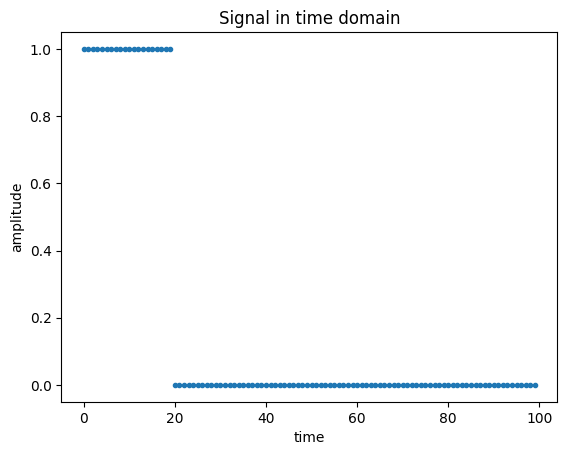

In [26]:
# Plot this signal in the time domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [ ]:
# Calculate DFT of this signal.
signal_freq = np.fft.fft(signal_time)

: 

: 

Text(0.5, 1.0, 'Spectrum of signal in frequency domain')

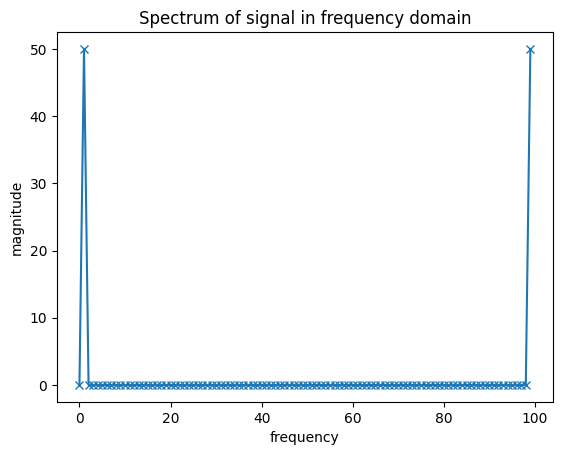

In [27]:
# Plot the magnitude of the signal in the frequency domain.
# PLOT USING 'x' FOR EACH VALUE AND DRAW LINES BETWEEN POINTS.
plt.plot(abs(signal_freq),'x-')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")

In [28]:
# Use IDFT to reconstruct time signal
signal_time_recon = np.fft.ifft(signal_freq)

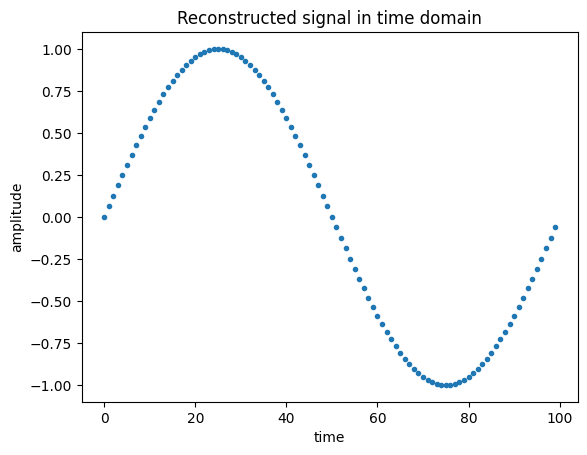

In [29]:
# Plot the reconstructed signal in the time domain. Since the output of the IDFT is
# complex, just plot real part.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(signal_time_recon.real,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Reconstructed signal in time domain")
plt.show()

## Part (F): A sin wave with period pi but not sampled for an integer number of periods.

In [30]:
# Create the same sampled sin as the second one above but now only consider
# the first 90 samples. The sin should again have a period of pi and still
# have a sample spacing of (2*pi)/100.

interval = np.linspace(0, 2*PI - 2*PI/100, N_SAMPLES)[:90]
signal_time = np.sin(2*interval)

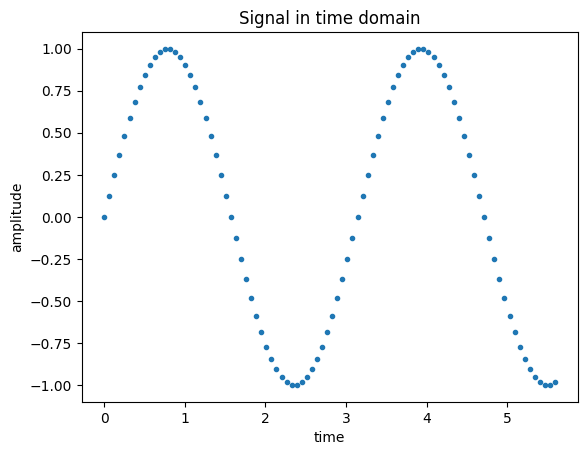

In [31]:
# Plot this signal in the time domain.
# Plot using '.' for each value and don't draw lines between values.
plt.plot(interval, signal_time,'.')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Signal in time domain")
plt.show()

In [32]:
# Calculate DFT of this signal.
signal_freq = np.fft.fft(signal_time)

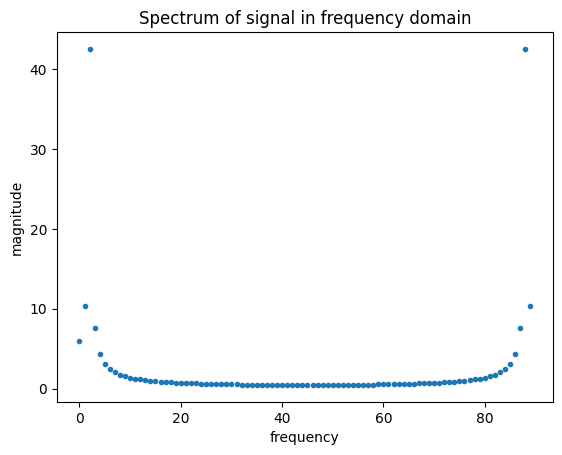

In [33]:
# Plot the magnitude (spectrum) of the signal in the frequency domain.
plt.plot(abs(signal_freq),'.')
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.title("Spectrum of signal in frequency domain")
plt.show()